<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap9/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-x8zcdyh5
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-x8zcdyh5
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=be8ee13ee6852651e478947914804e4172bbcb124abd449d0d6f7c651be63a3e
  Stored in directory: /tmp/pip-ephem-wheel-cache-obgek62f/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [5]:
# mount gdrive and unzip data
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive',force_remount=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Mounted at /content/gdrive


In [6]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap9/'
os.chdir(folder)
print(os.getcwd()) 
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap9
evaluate.py
load_data.py
train_test.py
Albumentationtransform.py
show_images.py
model.py
Trial.ipynb
gradcam.py
load_data.cpython-36.pyc
train_test.cpython-36.pyc
evaluate.cpython-36.pyc
Albumentationtransform.cpython-36.pyc
show_images.cpython-36.pyc
model.cpython-36.pyc
gradcam.cpython-36.pyc
cifar-10-python.tar.gz
test_batch
data_batch_3
data_batch_2
data_batch_5
data_batch_1
data_batch_4
batches.meta
readme.html
horse.jpg
deer.jpg
ship.jpeg
frog.jpg
plane.jpg
cat.jpeg
dog.jpeg
bird.jpeg
car.jpeg
truck.jpeg


In [0]:
%matplotlib inline
import torch
import load_data
import show_images
import model
import train_test
import evaluate
from Albumentationtransform import AlbumentationTransforms
import gradcam

In [0]:
import albumentations as A
from Albumentationtransform import AlbumentationTransforms
train_transform_list = [
                          A.Rotate((-30.0, 30.0)),
                          A.HorizontalFlip(),
                          A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
                          A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=1) # fillvalue is 0 after normalizing as mean is 0
                       ]
test_transform_list = [A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))]

train_transform = AlbumentationTransforms(train_transform_list)
test_transform = AlbumentationTransforms(test_transform_list)

In [19]:
classes, trainloader, testloader = load_data.load(train_transform,test_transform)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


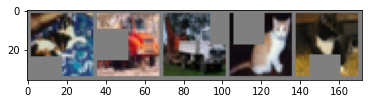

In [20]:
show_images.show_images(trainloader, classes)

In [21]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

In [23]:
testLoss = []
testAcc = []
EPOCHS = 30
#best_acc1 = 10
for epoch in range(EPOCHS):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     scheduler.step()
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.6399320363998413 Batch_id=390 Accuracy=27.19: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0131, Accuracy: 3821/10000 (38.21%)

EPOCH: 2 LR: 0.1


Loss=1.679478406906128 Batch_id=390 Accuracy=41.12: 100%|██████████| 391/391 [01:03<00:00,  6.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 4657/10000 (46.57%)

EPOCH: 3 LR: 0.1


Loss=1.384696125984192 Batch_id=390 Accuracy=48.48: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5614/10000 (56.14%)

EPOCH: 4 LR: 0.1


Loss=1.2481622695922852 Batch_id=390 Accuracy=54.24: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 6183/10000 (61.83%)

EPOCH: 5 LR: 0.1


Loss=1.0391887426376343 Batch_id=390 Accuracy=58.72: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 6540/10000 (65.40%)

EPOCH: 6 LR: 0.1


Loss=0.9031264185905457 Batch_id=390 Accuracy=62.08: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6896/10000 (68.96%)

EPOCH: 7 LR: 0.1


Loss=1.026934266090393 Batch_id=390 Accuracy=65.09: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 6831/10000 (68.31%)

EPOCH: 8 LR: 0.1


Loss=1.0673106908798218 Batch_id=390 Accuracy=67.41: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7405/10000 (74.05%)

EPOCH: 9 LR: 0.1


Loss=0.8526166677474976 Batch_id=390 Accuracy=69.83: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7560/10000 (75.60%)

EPOCH: 10 LR: 0.1


Loss=1.0149842500686646 Batch_id=390 Accuracy=70.88: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7516/10000 (75.16%)

EPOCH: 11 LR: 0.1


Loss=0.7481542229652405 Batch_id=390 Accuracy=72.01: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7835/10000 (78.35%)

EPOCH: 12 LR: 0.1


Loss=0.7599893808364868 Batch_id=390 Accuracy=73.20: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7706/10000 (77.06%)

EPOCH: 13 LR: 0.1


Loss=0.6685027480125427 Batch_id=390 Accuracy=74.02: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7583/10000 (75.83%)

EPOCH: 14 LR: 0.1


Loss=1.0155516862869263 Batch_id=390 Accuracy=74.38: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7756/10000 (77.56%)

EPOCH: 15 LR: 0.1


Loss=0.6472005844116211 Batch_id=390 Accuracy=75.12: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7961/10000 (79.61%)

EPOCH: 16 LR: 0.010000000000000002


Loss=0.3841220438480377 Batch_id=390 Accuracy=81.59: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8761/10000 (87.61%)

EPOCH: 17 LR: 0.010000000000000002


Loss=0.39066237211227417 Batch_id=390 Accuracy=83.96: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8830/10000 (88.30%)

EPOCH: 18 LR: 0.010000000000000002


Loss=0.480825811624527 Batch_id=390 Accuracy=84.61: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8859/10000 (88.59%)

EPOCH: 19 LR: 0.010000000000000002


Loss=0.42838937044143677 Batch_id=390 Accuracy=85.38: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8890/10000 (88.90%)

EPOCH: 20 LR: 0.010000000000000002


Loss=0.3389570116996765 Batch_id=390 Accuracy=85.82: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8898/10000 (88.98%)

EPOCH: 21 LR: 0.010000000000000002


Loss=0.3652685284614563 Batch_id=390 Accuracy=86.47: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8876/10000 (88.76%)

EPOCH: 22 LR: 0.010000000000000002


Loss=0.4397532045841217 Batch_id=390 Accuracy=86.83: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8927/10000 (89.27%)

EPOCH: 23 LR: 0.010000000000000002


Loss=0.45719513297080994 Batch_id=390 Accuracy=87.15: 100%|██████████| 391/391 [01:03<00:00,  6.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8981/10000 (89.81%)

EPOCH: 24 LR: 0.010000000000000002


Loss=0.3352406919002533 Batch_id=390 Accuracy=87.57: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8982/10000 (89.82%)

EPOCH: 25 LR: 0.010000000000000002


Loss=0.18209567666053772 Batch_id=390 Accuracy=88.01: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8967/10000 (89.67%)

EPOCH: 26 LR: 0.010000000000000002


Loss=0.3688843846321106 Batch_id=390 Accuracy=88.48: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8942/10000 (89.42%)

EPOCH: 27 LR: 0.010000000000000002


Loss=0.3187023997306824 Batch_id=390 Accuracy=88.37: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9039/10000 (90.39%)

EPOCH: 28 LR: 0.010000000000000002


Loss=0.2864933907985687 Batch_id=390 Accuracy=88.74: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8940/10000 (89.40%)

EPOCH: 29 LR: 0.010000000000000002


Loss=0.2255140244960785 Batch_id=390 Accuracy=88.96: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8970/10000 (89.70%)

EPOCH: 30 LR: 0.010000000000000002


Loss=0.5613116025924683 Batch_id=390 Accuracy=89.05: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]



Test set: Average loss: 0.0025, Accuracy: 8973/10000 (89.73%)



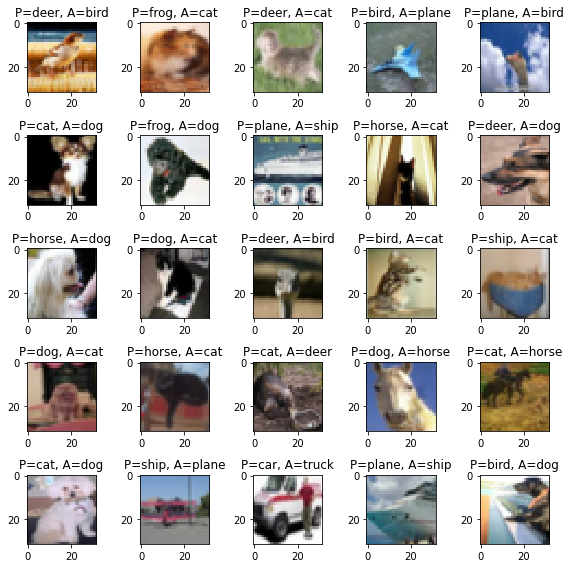

In [24]:
evaluate.show_misclassified_images(model, device, testloader, classes)

In [25]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 89 %


In [26]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 80 %
Accuracy of   car : 100 %
Accuracy of  bird : 88 %
Accuracy of   cat : 82 %
Accuracy of  deer : 93 %
Accuracy of   dog : 82 %
Accuracy of  frog : 100 %
Accuracy of horse : 88 %
Accuracy of  ship : 100 %
Accuracy of truck : 90 %


Text(0.5, 1.0, 'Test Accuracy')

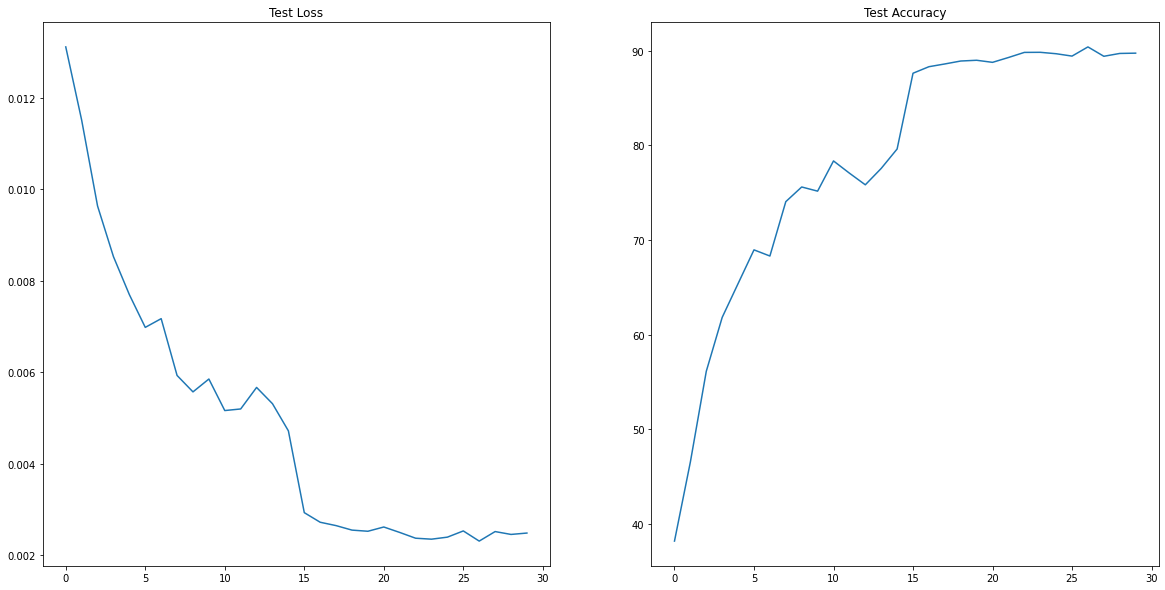

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(test_loss)
axs[0].set_title("Test Loss")


axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")

In [0]:
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)

In [0]:
import shutil
import torch.nn.functional as F
class GradCAM:
    """Calculate GradCAM salinecy map.
    Args:
        input: input image with shape of (1, 3, H, W)
        class_idx (int): class index for calculating GradCAM.
                If not specified, the class index that makes the highest model prediction score will be used.
    Return:
        mask: saliency map of the same spatial dimension with input
        logit: model output
    A simple example:
        # initialize a model, model_dict and gradcam
        resnet = torchvision.models.resnet101(pretrained=True)
        resnet.eval()
        gradcam = GradCAM.from_config(model_type='resnet', arch=resnet, layer_name='layer4')
        # get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
        img = load_img()
        normed_img = normalizer(img)
        # get a GradCAM saliency map on the class index 10.
        mask, logit = gradcam(normed_img, class_idx=10)
        # make heatmap from mask and synthesize saliency map using heatmap and img
        heatmap, cam_result = visualize_cam(mask, img)
    """

    def __init__(self, model, layer_name):
        self.model = model
        # self.layer_name = layer_name
        self.target_layer = layer_name

        self.gradients = dict()
        self.activations = dict()

        def backward_hook(module, grad_input, grad_output):
            self.gradients['value'] = grad_output[0]

        def forward_hook(module, input, output):
            self.activations['value'] = output

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    @classmethod
    def from_config(cls, arch: torch.nn.Module, model_type: str, layer_name: str):
        target_layer = layer_finders[model_type](arch, layer_name)
        return cls(arch, target_layer)

    def saliency_map_size(self, *input_size):
        device = next(self.model_arch.parameters()).device
        self.model(torch.zeros(1, 3, *input_size, device=device))
        return self.activations['value'].shape[2:]

    def forward(self, input, class_idx=None, retain_graph=False):
        b, c, h, w = input.size()

        logit = self.model(input)
        if class_idx is None:
            score = logit[:, logit.max(1)[-1]].squeeze()
        else:
            score = logit[:, class_idx].squeeze()

        self.model.zero_grad()
        score.backward(retain_graph=retain_graph)
        gradients = self.gradients['value']
        activations = self.activations['value']
        b, k, u, v = gradients.size()

        alpha = gradients.view(b, k, -1).mean(2)
        # alpha = F.relu(gradients.view(b, k, -1)).mean(2)
        weights = alpha.view(b, k, 1, 1)

        saliency_map = (weights*activations).sum(1, keepdim=True)
        saliency_map = F.relu(saliency_map)
        saliency_map = F.upsample(saliency_map, size=(h, w), mode='bilinear', align_corners=False)
        saliency_map_min, saliency_map_max = saliency_map.min(), saliency_map.max()
        saliency_map = (saliency_map - saliency_map_min).div(saliency_map_max - saliency_map_min).data
        
        self.gradients.clear()
        self.activations.clear()
        return saliency_map, logit

    def __call__(self, input, class_idx=None, retain_graph=False):
        return self.forward(input, class_idx, retain_graph)

In [0]:
import cv2
def visualize_cam(mask, img, alpha=1.0):
    """Make heatmap from mask and synthesize GradCAM result image using heatmap and img.
    Args:
        mask (torch.tensor): mask shape of (1, 1, H, W) and each element has value in range [0, 1]
        img (torch.tensor): img shape of (1, 3, H, W) and each pixel value is in range [0, 1]
    Return:
        heatmap (torch.tensor): heatmap img shape of (3, H, W)
        result (torch.tensor): synthesized GradCAM result of same shape with heatmap.
    """
    heatmap = (255 * mask.squeeze()).type(torch.uint8).cpu().numpy()
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = torch.from_numpy(heatmap).permute(2, 0, 1).float().div(255)
    b, g, r = heatmap.split(1)
    heatmap = torch.cat([r, g, b]) * alpha

    result = heatmap+img.cpu()
    result = result.div(result.max()).squeeze()

    return heatmap, result

In [31]:
import PIL
img_name =[sys.path[-1]+'images/cat.jpeg',sys.path[-1]+'images/dog.jpeg',sys.path[-1]+'images/bird.jpeg',sys.path[-1]+'images/truck.jpeg',sys.path[-1]+'images/car.jpeg']
print(sys.path[-1])
pil_image = []
for i,img in enumerate(img_name):
   print(img_name)
   pil_image.append(PIL.Image.open(img))

/content/gdrive/My Drive/school_of_ai/chap9/
['/content/gdrive/My Drive/school_of_ai/chap9/images/cat.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/dog.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/bird.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/truck.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/car.jpeg']
['/content/gdrive/My Drive/school_of_ai/chap9/images/cat.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/dog.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/bird.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/truck.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/car.jpeg']
['/content/gdrive/My Drive/school_of_ai/chap9/images/cat.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/dog.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/bird.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/truck.jpeg', '/content/gdrive/My Drive/school_of_ai/chap9/images/car.jpeg'

In [0]:
from torchvision import transforms
normed_torch_img = []
torch_img_list = []

for i in pil_image:
  torch_img = transforms.Compose([
      transforms.Resize((32, 32)),
      transforms.ToTensor()
  ])(i).to(device)
  torch_img_list.append(torch_img)

  normed_torch_img .append(transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])(torch_img)[None])

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img ):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig = plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)),interpolation='none')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


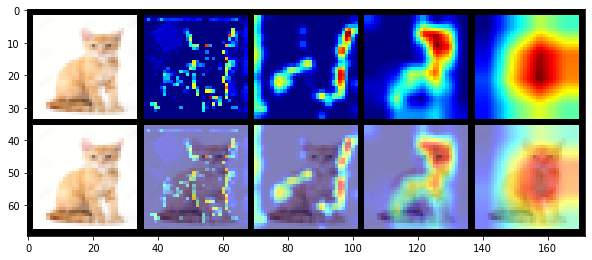

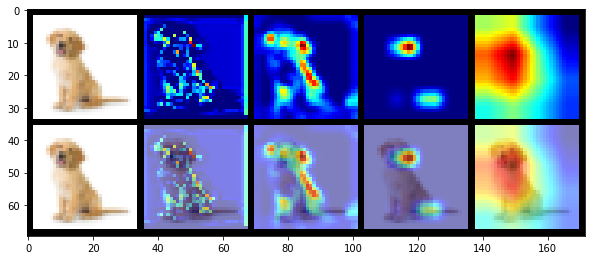

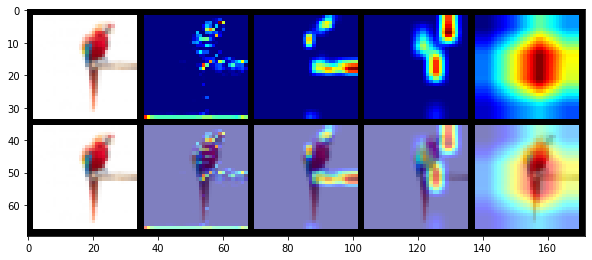

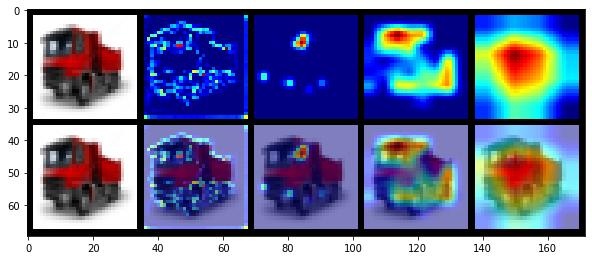

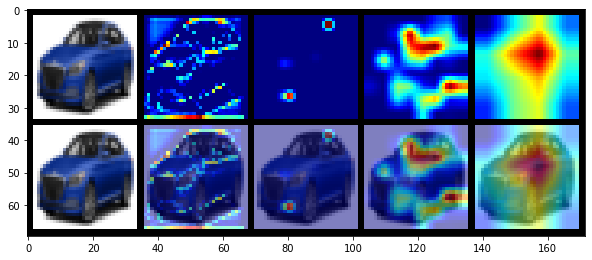

In [34]:
import copy
from torchvision.utils import make_grid, save_image
#import model
for i,k in enumerate(normed_torch_img):
  images1 = [torch_img_list[i].cpu()]
  images2 =  [torch_img_list[i].cpu()]
  b = copy.deepcopy(model.to(device))
  layers =  [b.layer1,b.layer2,b.layer3,b.layer4]
  for j in layers: 
    g = gradcam.GradCAM(b,j)
    mask, _= g(normed_torch_img[i])
    heatmap, result = gradcam.visualize_cam(mask,torch_img_list[i] )
    images1.extend([heatmap])
    images2.extend([result])
  grid_image = make_grid(images1+images2, nrow=5)
  imshow(grid_image)